In [4]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
import pandas as pd
#path='C:/Users/dell/OneDrive/Desktop/rupesh/CBIT/WorkShop/21-06-2021/Rupesh Mishra/Car_price_prediction/data\car_data.csv'
path = '//content/verify_tf_df_adv.csv'

df = pd.read_csv(path)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df.head(10)

,Unnamed: 0,title,paper_id
0,0,a systematic review and meta-analysis of the e...,b7a6a987030c52cc7ecdf49c3933b6cfda488210
1,1,NaN,28223ad437aa22ac2285bd9dd775e1415a69411a
2,2,citation expression pattern analysis of antiv...,b6c38211730ff7826aa6a52aff9e3be848f8e738
3,3,the middle east respiratory syndrome coronavir...,e6a9266f1f45099b19b5c4f3a4cf62de41786e54
4,4,the ebola virus disease outbreak in west afric...,e788ce631ca8a7d0a0d0b48dfd06d343de282972
5,5,more and more coronaviruses human coronavirus...,27b4bbbc97d4660bbfef9e12bf3c3b9790df9014
6,6,prevalence of cryptosporidia eimeria giardia...,9ce0da57763dfa3cebfb1463093ff0bba3333a25
7,7,phellodendron chinense schneid a novel yellow...,9740b9f6f49dc554d7be515871bd31123bda5473
8,8,open peer review discuss this article comment...,f291cfbcb64f14deb49a2dcc95079a17e838cf85
9,9,r e v i e w open access advances in prevention...,6b1560c20661e5dea1c1d2c391c1fa68f6cf83ca


In [8]:
df.tail(10)

,Unnamed: 0,title,paper_id
59301,59301,detection of rickettsial dna in ticks and wild...,PMC4347921
59302,59302,better understanding on mers corona virus outb...,PMC4479933
59303,59303,nepal’s first case of covid-19 and public heal...,PMC7107523
59304,59304,phenobarbital-induced anticonvulsant hypersens...,PMC6943318
59305,59305,clathrin-dependent localization of alpha 1 3 m...,PMC2120240
59306,59306,balkan endemic nephropathy—current status and ...,PMC4400492
59307,59307,a golgi retention signal in a membrane-spannin...,PMC2289920
59308,59308,simultaneous detection of eleven sexually tran...,PMC6717854
59309,59309,the epidemiology of hand foot and mouth disea...,PMC5130063
59310,59310,community-acquired pseudomonas aeruginosa-pneu...,PMC5444396


In [9]:
df.shape

(59311, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59311 entries, 0 to 59310
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  59311 non-null  int64 
 1   title       54989 non-null  object
 2   paper_id    59311 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [11]:
df.describe()

,Unnamed: 0
count,59311.000000
mean,29655.000000
std,17121.755245
min,0.000000
25%,14827.500000
50%,29655.000000
75%,44482.500000
max,59310.000000


In [12]:
df.isnull().sum()#checking if there are null values

Unnamed: 0       0
title         4322
paper_id         0
dtype: int64

In [13]:
#removing the rows containing null values
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Unnamed: 0    0
title         0
paper_id      0
dtype: int64

In [15]:
df.columns

Index(['Unnamed: 0', 'title', 'paper_id'], dtype='object')

In [16]:
!pip install nltk

In [17]:
!pip install scikit-learn

In [18]:
import pandas as pd
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'text_column' is the name of the column containing text data
text_data = df['title']

# Tokenization (with handling non-string values)
tokenized_text = text_data.apply(lambda x: word_tokenize(str(x)) if isinstance(x, str) else [])
print(tokenized_text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


0        [a, systematic, review, and, meta-analysis, of...
2        [citation, expression, pattern, analysis, of, ...
3        [the, middle, east, respiratory, syndrome, cor...
4        [the, ebola, virus, disease, outbreak, in, wes...
5        [more, and, more, coronaviruses, human, corona...
                               ...                        
59306    [balkan, endemic, nephropathy—current, status,...
59307    [a, golgi, retention, signal, in, a, membrane-...
59308    [simultaneous, detection, of, eleven, sexually...
59309    [the, epidemiology, of, hand, foot, and, mouth...
59310    [community-acquired, pseudomonas, aeruginosa-p...
Name: title, Length: 54989, dtype: object


In [19]:
#converting the text to lower case
lowercased_text = tokenized_text.apply(lambda x: [word.lower() for word in x])
print(lowercased_text)

0        [a, systematic, review, and, meta-analysis, of...
2        [citation, expression, pattern, analysis, of, ...
3        [the, middle, east, respiratory, syndrome, cor...
4        [the, ebola, virus, disease, outbreak, in, wes...
5        [more, and, more, coronaviruses, human, corona...
                               ...                        
59306    [balkan, endemic, nephropathy—current, status,...
59307    [a, golgi, retention, signal, in, a, membrane-...
59308    [simultaneous, detection, of, eleven, sexually...
59309    [the, epidemiology, of, hand, foot, and, mouth...
59310    [community-acquired, pseudomonas, aeruginosa-p...
Name: title, Length: 54989, dtype: object


In [20]:
#removing special characters
def remove_special_characters(tokens):
    return [re.sub(r'[^a-zA-Z0-9\s]', '', token) for token in tokens]

cleaned_text = lowercased_text.apply(remove_special_characters)
print(cleaned_text)

0        [a, systematic, review, and, metaanalysis, of,...
2        [citation, expression, pattern, analysis, of, ...
3        [the, middle, east, respiratory, syndrome, cor...
4        [the, ebola, virus, disease, outbreak, in, wes...
5        [more, and, more, coronaviruses, human, corona...
                               ...                        
59306    [balkan, endemic, nephropathycurrent, status, ...
59307    [a, golgi, retention, signal, in, a, membranes...
59308    [simultaneous, detection, of, eleven, sexually...
59309    [the, epidemiology, of, hand, foot, and, mouth...
59310    [communityacquired, pseudomonas, aeruginosapne...
Name: title, Length: 54989, dtype: object


In [21]:
# Stemming or Lemmatization
#stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

#stemmed_text = filtered_text.apply(lambda x: [stemmer.stem(word) for word in x])
lemmatized_text = cleaned_text.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
print(lemmatized_text)

0        [a, systematic, review, and, metaanalysis, of,...
2        [citation, expression, pattern, analysis, of, ...
3        [the, middle, east, respiratory, syndrome, cor...
4        [the, ebola, virus, disease, outbreak, in, wes...
5        [more, and, more, coronaviruses, human, corona...
                               ...                        
59306    [balkan, endemic, nephropathycurrent, status, ...
59307    [a, golgi, retention, signal, in, a, membranes...
59308    [simultaneous, detection, of, eleven, sexually...
59309    [the, epidemiology, of, hand, foot, and, mouth...
59310    [communityacquired, pseudomonas, aeruginosapne...
Name: title, Length: 54989, dtype: object


In [22]:
# Handling numbers
def remove_numbers(tokens):
    return [token for token in tokens if not token.isdigit()]

processed_text_no_numbers= lemmatized_text.apply(remove_numbers)
print(processed_text_no_numbers)

0        [a, systematic, review, and, metaanalysis, of,...
2        [citation, expression, pattern, analysis, of, ...
3        [the, middle, east, respiratory, syndrome, cor...
4        [the, ebola, virus, disease, outbreak, in, wes...
5        [more, and, more, coronaviruses, human, corona...
                               ...                        
59306    [balkan, endemic, nephropathycurrent, status, ...
59307    [a, golgi, retention, signal, in, a, membranes...
59308    [simultaneous, detection, of, eleven, sexually...
59309    [the, epidemiology, of, hand, foot, and, mouth...
59310    [communityacquired, pseudomonas, aeruginosapne...
Name: title, Length: 54989, dtype: object


In [23]:
# Removing rare or infrequent words
def remove_rare_words(tokens, min_frequency=0.05):
    word_counts = nltk.FreqDist(tokens)
    return [token for token in tokens if word_counts[token] >= min_frequency]

processed_text_no_rare_words = processed_text_no_numbers.apply(remove_rare_words)
print(processed_text_no_rare_words)

0        [a, systematic, review, and, metaanalysis, of,...
2        [citation, expression, pattern, analysis, of, ...
3        [the, middle, east, respiratory, syndrome, cor...
4        [the, ebola, virus, disease, outbreak, in, wes...
5        [more, and, more, coronaviruses, human, corona...
                               ...                        
59306    [balkan, endemic, nephropathycurrent, status, ...
59307    [a, golgi, retention, signal, in, a, membranes...
59308    [simultaneous, detection, of, eleven, sexually...
59309    [the, epidemiology, of, hand, foot, and, mouth...
59310    [communityacquired, pseudomonas, aeruginosapne...
Name: title, Length: 54989, dtype: object


In [24]:
# Word frequency filtering
def filter_word_frequency(tokens, min_frequency=1):
    word_counts = nltk.FreqDist(tokens)
    return [token for token in tokens if word_counts[token] >= min_frequency]


processed_text_filtered = processed_text_no_rare_words.apply(filter_word_frequency)
print(processed_text_filtered)

0        [a, systematic, review, and, metaanalysis, of,...
2        [citation, expression, pattern, analysis, of, ...
3        [the, middle, east, respiratory, syndrome, cor...
4        [the, ebola, virus, disease, outbreak, in, wes...
5        [more, and, more, coronaviruses, human, corona...
                               ...                        
59306    [balkan, endemic, nephropathycurrent, status, ...
59307    [a, golgi, retention, signal, in, a, membranes...
59308    [simultaneous, detection, of, eleven, sexually...
59309    [the, epidemiology, of, hand, foot, and, mouth...
59310    [communityacquired, pseudomonas, aeruginosapne...
Name: title, Length: 54989, dtype: object


In [25]:
# Removing stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_text = processed_text_filtered.apply(lambda x: [word for word in x if word not in stop_words])
print(filtered_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0        [systematic, review, metaanalysis, epidemiolog...
2        [citation, expression, pattern, analysis, anti...
3        [middle, east, respiratory, syndrome, coronavi...
4        [ebola, virus, disease, outbreak, west, africa...
5                [coronaviruses, human, coronavirus, hku1]
                               ...                        
59306    [balkan, endemic, nephropathycurrent, status, ...
59307    [golgi, retention, signal, membranespanning, d...
59308    [simultaneous, detection, eleven, sexually, tr...
59309     [epidemiology, hand, foot, mouth, disease, asia]
59310    [communityacquired, pseudomonas, aeruginosapne...
Name: title, Length: 54989, dtype: object


In [26]:
!pip install wordcloud

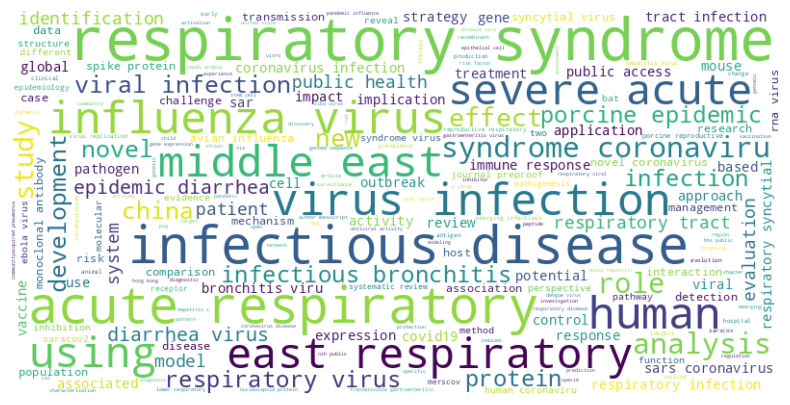

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokens into a single list
all_tokens = [token for tokens_list in filtered_text for token in tokens_list]

# Join all tokens into a single string
all_tokens_text = ' '.join(all_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


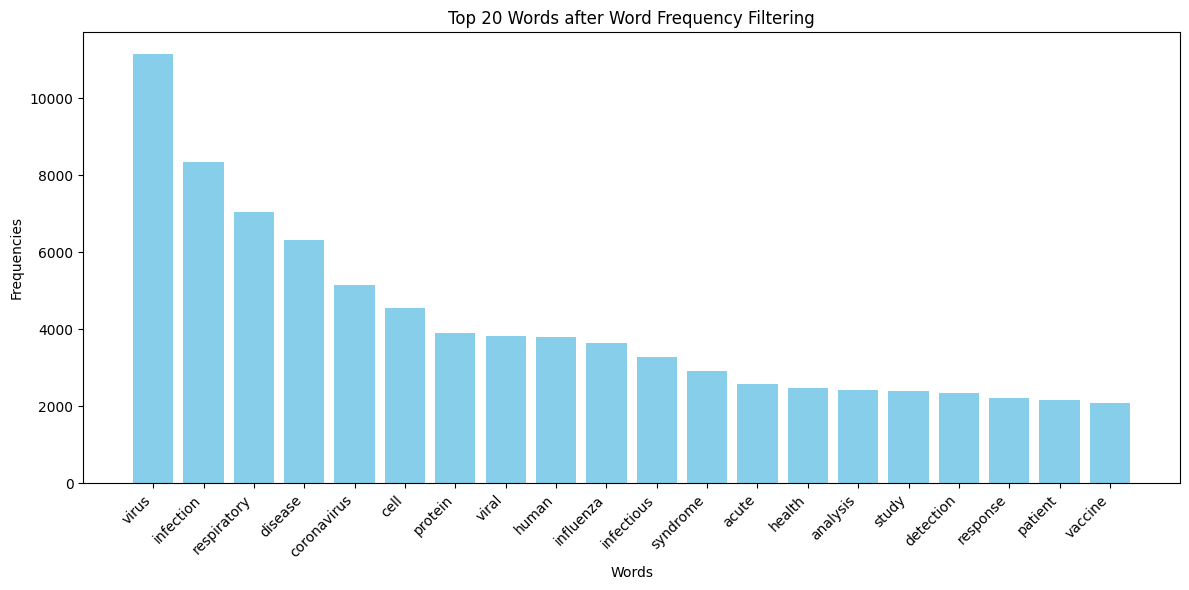

In [28]:
import matplotlib.pyplot as plt
import nltk

# Combine all tokens into a single list
all_tokens = [token for tokens_list in filtered_text for token in tokens_list]

# Calculate word frequencies
word_counts = nltk.FreqDist(all_tokens)

# Sort word frequencies in descending order
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Extract top N words and their frequencies for plotting
top_n = 21  # Adjust this value as needed
top_words = [word[0] for word in sorted_word_counts[:top_n]]
top_frequencies = [word[1] for word in sorted_word_counts[:top_n]]

# Remove empty string from top_words list
top_words = [word for word in top_words if word]

# Ensure that top_frequencies has the same length as top_words
top_frequencies = top_frequencies[:len(top_words)]

# Create bar chart with adjusted plot size, rotation angle, and font size
plt.figure(figsize=(12, 6))  # Increase the width of the plot
plt.bar(top_words, top_frequencies, color='skyblue')
plt.xlabel('Words', fontsize=10)  # Adjust the font size of the x-axis labels
plt.ylabel('Frequencies')
plt.title('Top {} Words after Word Frequency Filtering'.format(len(top_words)))  # Update the title
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [29]:
!pip install squarify

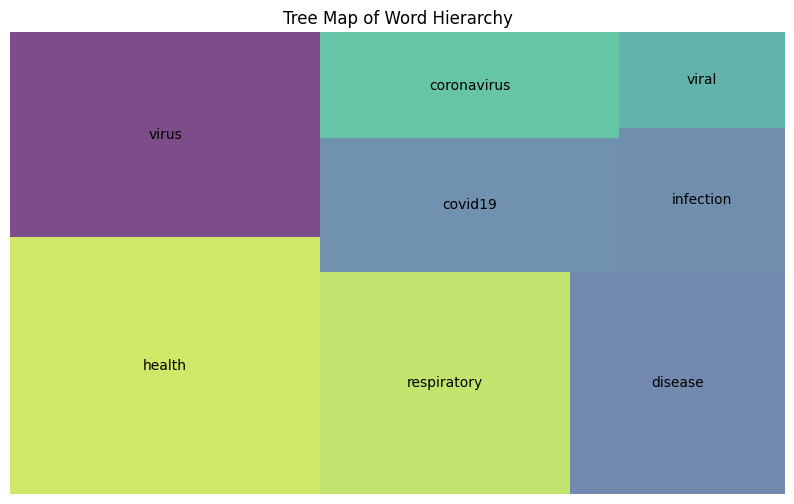

In [30]:
import matplotlib.pyplot as plt
import squarify

# Example data (replace with your own data)
labels = ['health', 'virus', 'respiratory', 'disease', 'covid19', 'coronavirus', 'infection', 'viral']
sizes = [100, 80, 70, 60, 50, 40, 30, 20]

# Create the tree map
plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.7)

# Add labels
plt.title('Tree Map of Word Hierarchy')
plt.axis('off')  # Hide axis
plt.show()


In [31]:
# Part-of-speech tagging
pos_tagged_text = filtered_text.apply(nltk.pos_tag)
print(pos_tagged_text)

0        [(systematic, JJ), (review, NN), (metaanalysis...
2        [(citation, NN), (expression, NN), (pattern, N...
3        [(middle, JJ), (east, JJ), (respiratory, NN), ...
4        [(ebola, NN), (virus, NN), (disease, NN), (out...
5        [(coronaviruses, NNS), (human, JJ), (coronavir...
                               ...                        
59306    [(balkan, JJ), (endemic, JJ), (nephropathycurr...
59307    [(golgi, JJ), (retention, NN), (signal, NN), (...
59308    [(simultaneous, JJ), (detection, NN), (eleven,...
59309    [(epidemiology, NN), (hand, NN), (foot, NN), (...
59310    [(communityacquired, VBN), (pseudomonas, NNS),...
Name: title, Length: 54989, dtype: object


In [32]:
vectorizer = CountVectorizer()
vectorized_text = vectorizer.fit_transform(filtered_text.apply(lambda x: ' '.join(x)))

# Displaying the vectorized text
print(vectorized_text)

  (0, 28830)	1
  (0, 25657)	1
  (0, 18174)	1
  (0, 10007)	1
  (0, 22116)	2
  (0, 10177)	1
  (0, 6184)	2
  (0, 4644)	2
  (0, 25949)	1
  (0, 25428)	1
  (0, 13838)	1
  (1, 5826)	1
  (1, 10572)	1
  (1, 22171)	1
  (1, 1929)	1
  (1, 2424)	1
  (1, 11895)	1
  (1, 15007)	1
  (1, 7502)	1
  (1, 22304)	1
  (1, 23363)	1
  (1, 15475)	1
  (1, 10042)	1
  (1, 5255)	1
  (2, 18514)	1
  :	:
  (54986, 27303)	1
  (54986, 30896)	1
  (54986, 1389)	1
  (54986, 19268)	1
  (54986, 29986)	1
  (54986, 6973)	1
  (54986, 27026)	1
  (54986, 17554)	1
  (54986, 9510)	1
  (54987, 10007)	1
  (54987, 8520)	1
  (54987, 12823)	1
  (54987, 11336)	1
  (54987, 19046)	1
  (54987, 2791)	1
  (54988, 11231)	1
  (54988, 13000)	1
  (54988, 6315)	1
  (54988, 23803)	1
  (54988, 10566)	1
  (54988, 24277)	1
  (54988, 17597)	1
  (54988, 1310)	1
  (54988, 20952)	1
  (54988, 18222)	1


In [33]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)  # You can adjust the number of topics (n_components) as needed

# Fit the LDA model to the vectorized text data
lda_model.fit(vectorized_text)

# Print the topics generated by the LDA model
# Print the topics generated by the LDA model
# Print the topics generated by the LDA model
def print_topics(model, vectorizer, n_top_words):
    words = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()



# Specify the number of top words to display for each topic
n_top_words = 10

# Print the top words for each topic
print_topics(lda_model, vectorizer, n_top_words)


Topic #1:
detection assay antibody virus human coronavirus infection rapid development realtime

Topic #2:
respiratory infection acute severe child viral syndrome patient human disease

Topic #3:
virus protein cell infection coronavirus viral response replication host human

Topic #4:
detection infection virus feline calf pathogen using identification clinical cat

Topic #5:
health disease covid19 outbreak coronavirus east middle respiratory syndrome review

Topic #6:
disease infectious virus emerging epidemic bronchitis analysis diarrhea porcine strain

Topic #7:
vaccine virus development vector efficacy recombinant trial mouse using dna

Topic #8:
genome cell sequence analysis protein rna novel characterization canine acid

Topic #9:
rna bat antiviral inhibitor access public novel de coronavirus potential

Topic #10:
influenza virus infection respiratory porcine study case avian pandemic report



In [34]:
!pip install gensim

In [35]:
from sklearn.metrics import silhouette_score

# Assuming 'lda_model' is your trained LDA model
# Assuming 'vectorized_text' is the vectorized text data

# Get the document-topic probabilities from the LDA model
document_topic_matrix = lda_model.transform(vectorized_text)

# Assign each document to the topic with the highest probability
document_topic_labels = document_topic_matrix.argmax(axis=1)

# Calculate silhouette score
silhouette_avg = silhouette_score(document_topic_matrix, labels=document_topic_labels)

print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.4465568421188829


In [36]:
'''import numpy as np

def calculate_topic_stability(coherence_score):
    mean_coherence = np.mean(coherence_score)
    std_coherence = np.std(coherence_score)
    return mean_coherence, std_coherence

# Assuming 'coherence_scores' is a list containing coherence scores from different runs
mean_coherence, std_coherence = calculate_topic_stability(coherence_score)
print("Mean Coherence:", mean_coherence)
print("Standard Deviation of Coherence:", std_coherence)'''


'import numpy as np\n\ndef calculate_topic_stability(coherence_score):\n    mean_coherence = np.mean(coherence_score)\n    std_coherence = np.std(coherence_score)\n    return mean_coherence, std_coherence\n\n# Assuming \'coherence_scores\' is a list containing coherence scores from different runs\nmean_coherence, std_coherence = calculate_topic_stability(coherence_score)\nprint("Mean Coherence:", mean_coherence)\nprint("Standard Deviation of Coherence:", std_coherence)'

In [37]:
from sklearn.decomposition import NMF

# Assuming 'vectorized_text' is the vectorized text data using CountVectorizer

# Initialize NMF model
nmf_model = NMF(n_components=10, random_state=42)  # You can adjust the number of topics (n_components) as needed

# Fit the NMF model to the vectorized text data
nmf_model.fit(vectorized_text)

# Print the topics generated by the NMF model
def print_nmf_topics(model, vectorizer, n_top_words):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

# Specify the number of top words to display for each topic
n_top_words = 10

# Print the top words for each topic
print_nmf_topics(nmf_model, vectorizer, n_top_words)


Topic #1:
virus influenza porcine epidemic detection diarrhea rna hepatitis bronchitis strain

Topic #2:
respiratory syndrome acute severe middle east patient tract child study

Topic #3:
disease infectious emerging clinical bronchitis control outbreak vaccine review model

Topic #4:
infection child tract control respiratory response clinical patient role mouse

Topic #5:
protein spike expression domain membrane nucleocapsid recombinant response antibody sarscov

Topic #6:
cell response mouse stem expression epithelial receptor immune dendritic host

Topic #7:
coronavirus novel middle east sars syndrome analysis outbreak spike china

Topic #8:
health influenza public study pandemic covid19 care patient response global

Topic #9:
human antibody detection metapneumovirus bocavirus coronaviruses child monoclonal rhinovirus molecular

Topic #10:
viral rna pathogen replication detection host bacterial pneumonia role analysis



In [38]:
import sklearn
print(f"scikit-learn version: {sklearn.__version__}")


scikit-learn version: 1.2.2


In [39]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Assuming 'vectorized_text' is the vectorized text data using CountVectorizer
# Assuming 'nmf_model' is your trained NMF model

# Transform the vectorized text data using the NMF model
nmf_features = nmf_model.transform(vectorized_text)

# Assuming 'n_clusters' is the number of clusters for K-means
# Assuming 'random_state' for reproducibility
n_clusters = 5  # Example number of clusters
random_state = 42  # Example random state

# Initialize K-means clustering algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

# Apply K-means clustering to the NMF-transformed data
cluster_labels = kmeans.fit_predict(nmf_features)

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(nmf_features, cluster_labels)
print("Silhouette Score:", silhouette_avg)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.43427799125208816


In [41]:
from sklearn.decomposition import TruncatedSVD
# Fit the CountVectorizer to the processed text data
vectorized_text = vectorizer.fit_transform(filtered_text.apply(lambda x: ' '.join(x)))
# Initialize LSA model
lsa_model = TruncatedSVD(n_components=10, random_state=42)  # You can adjust the number of topics (n_components) as needed

# Fit the LSA model to the vectorized text data
lsa_model.fit(vectorized_text)
def print_lsa_topics(model, vectorizer, n_top_words):
    words = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()


# Print the top words for each topic
print_lsa_topics(lsa_model, vectorizer, n_top_words)


Topic #1:
virus respiratory infection coronavirus disease syndrome influenza cell viral human

Topic #2:
virus influenza porcine diarrhea rna epidemic protein hepatitis bronchitis cell

Topic #3:
disease infectious health emerging viral clinical human system vaccine study

Topic #4:
coronavirus syndrome disease respiratory east middle infectious protein virus severe

Topic #5:
cell protein coronavirus human expression response sars novel spike mouse

Topic #6:
cell respiratory human acute disease stem epithelial syndrome severe lung

Topic #7:
protein viral respiratory disease acute porcine rna infectious expression replication

Topic #8:
influenza health viral protein public study pandemic patient covid19 care

Topic #9:
human viral detection influenza child respiratory assay pathogen antibody rna

Topic #10:
viral health detection porcine rna coronavirus epidemic public diarrhea analysis



In [42]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD

# Calculate silhouette score
document_topic_matrix = lsa_model.transform(vectorized_text)
silhouette_avg = silhouette_score(document_topic_matrix, labels=document_topic_matrix.argmax(axis=1))
print("Silhouette Score:", silhouette_avg)


Silhouette Score: -0.25095234163809366


In [43]:
'''a silhouette score of 0.443 is relatively high and indicates that the
clusters are well-separated and distinct from each other. This suggests that
the Latent Dirichlet Allocation (LDA) model has effectively grouped the data
into coherent topics compared to the other models.'''

'a silhouette score of 0.443 is relatively high and indicates that the\nclusters are well-separated and distinct from each other. This suggests that\nthe Latent Dirichlet Allocation (LDA) model has effectively grouped the data\ninto coherent topics compared to the other models.'